## GRADIENT DESCENT MULTIPLAS VARIÁVEIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib inline


In [2]:
df = pd.read_csv('prices.csv')
df.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Normalizando os dados

In [3]:
df = (df - df.mean())/df.std()
df.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## PEGANDO O NÚMERO DE FEATURES

In [4]:
n_features = len(df.columns)-1 ## desconsiderando o target 'price'
n_features

2

## Criando um vetor de W's baseado na quantidades de features

In [5]:
w = np.zeros([1,n_features+1])
w

array([[0., 0., 0.]])

## TRANSFORMANDO OS DATAFRAME EM NUMPY

In [6]:
X = np.array(df.drop('price', 1))
y = df.iloc[:,2:3].values
y

array([[ 0.47574687],
       [-0.08407444],
       [ 0.22862575],
       [-0.86702453],
       [ 1.59538948],
       [-0.32399786],
       [-0.20403615],
       [-1.13094828],
       [-1.02697347],
       [-0.78305133],
       [-0.80305294],
       [ 0.05268191],
       [-0.08328269],
       [ 2.87498104],
       [-0.64389575],
       [ 0.87561923],
       [-0.32399786],
       [-1.12374258],
       [ 1.27627534],
       [ 2.06803861],
       [-0.69987788],
       [-0.68308324],
       [-0.77985235],
       [-0.64389575],
       [ 1.86730269],
       [-0.72387022],
       [ 0.99238196],
       [ 1.02837047],
       [ 1.07635515],
       [-0.32399786],
       [ 0.0758745 ],
       [-1.363666  ],
       [-0.20403615],
       [ 1.91528737],
       [-0.43596212],
       [-0.72387022],
       [-0.88381916],
       [ 0.03668701],
       [ 1.66816625],
       [-0.42716493],
       [ 0.22462702],
       [-0.08407444],
       [-0.21123385],
       [-0.33119556],
       [-1.28369153],
       [-0

## CRIANDO X0 (adicionando o bias)

In [7]:
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

#### DEFININDO TAXA DE APRENDIZADO

## DEFININDO CUSTO

In [8]:
def custo(w, X, y):
    N = len(X)
    W_transposed = w.transpose()
    h = np.power(((X @ w.T)-y),2) ## @ é a mesma coisa que dot 
    return np.sum(h)/(2 * len(X))
    
    
custo(w,X,y)

0.48936170212765967

## GRADIENT DESCENT

In [9]:
def gradient_descent(w,X,y,alpha,epoch):
    cost = np.zeros(epoch)
    for i in range(epoch):
        w = w - (alpha/len(X)) * np.sum(X * (X @ w.T - y), axis=0)
        cost[i] = custo(w, X, y)
    
    return w,cost

In [10]:
alpha=0.001 # taxa de aprendizado
epoch = 2000

In [11]:
w, cost = gradient_descent(w, X, y, alpha, epoch)

## Custo final

In [12]:
custo(w, X, y)

0.14818093615129857

## MOSTRANDO O CUSTO

Text(0.5,1,'Erro vs. Epoch')

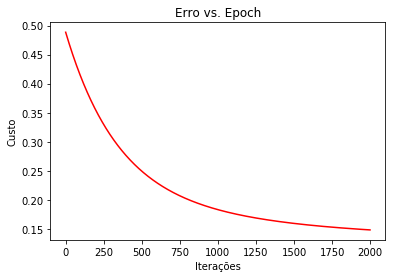

In [13]:
#plotando o custo
fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), cost, 'r')  
ax.set_xlabel('Iterações')  
ax.set_ylabel('Custo')  
ax.set_title('Erro vs. Epoch')  